# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [9]:
# Allowded to use only these libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory data analysis

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


Text(0, 0.5, 'Salary')

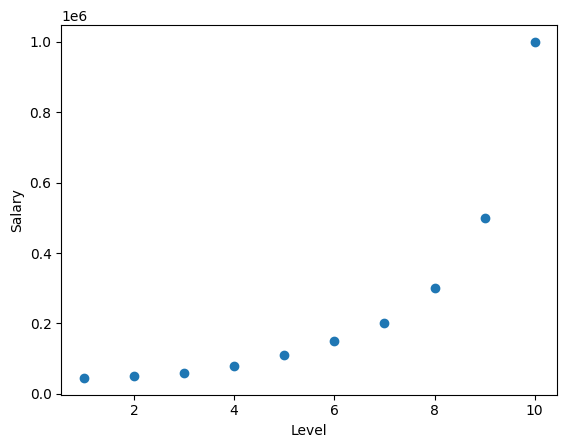

In [10]:
# your code(s)
ds=pd.read_csv("Position_Salaries.csv")
print(ds.head())
x=ds['Level'].values
y=ds['Salary'].values
plt.scatter(x,y)
plt.xlabel('Level')
plt.ylabel('Salary')

### Based on the exploratory data analysis, answer the following


* Can you use a simple linear regression model to fit this data (Yes/No)?
> * No
* If you use a simple linear model to fit this data, will it fit well (Yes/No)?
> * No
* Explain why you said yes or no to the above questions.
> * From the plot represented above, it is clear that the data points do not follow a linear pattern. The regression line will possibly be quite far from the points.



## Polynomial Regression

**Construct a second order Model:** $$\;\;\;\;
\hat y = w_1 x_1^2 + w_2x_1 + b
$$

**Construct a Cost function:**
$$MSE(w_1,w_2,b)= your\;answer$$

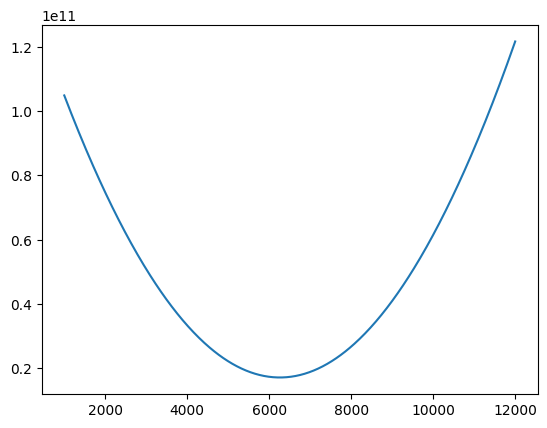

In [13]:
# your code to plot the cost function (if required)
w = 1000
b = 2861
c = 1000
N = x.size
MSE = 1/N*np.sum((((c*x*x)+(w*x)+b)-y)**2)
w = np.linspace(1000, 12000, 500)
c = np.linspace(1000, 12000, 500)
MSE =np.empty(w.shape)
for i in range(500):
  MSE[i] = 1/N*np.sum(((np.dot(x,w[i])+np.dot((x*x),c[i])+b)-y)**2)

plt.plot(w,MSE)


### By analysing the cost function, answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * Yes
* Explain why you said yes or no to the above questions.
> * To get a quantifiable measure of how incorrect the model is, we calculate the Mean Squared Error loss for the model. 

**Derivatives of cost function:**

$ \frac{\partial MSE}{\partial w} = \frac{2}{N} \sum_{i=0}^{N} \left( (cx_i^2 + wx_i+b - y_i) x_i \right) $

$ \frac{\partial MSE}{\partial c} = \frac{2}{N} \sum_{i=0}^{N} \left( (cx_i^2+wx_i + b - y_i)x_i^2 \right) $

$ \frac{\partial MSE}{\partial b} = \frac{2}{N} \sum_{i=0}^{N} \left( cx_i^2+wx_i + b - y_i \right) $

**Gradient Descent Algorithm:**
```
Repeat until converges:
```
$w = w -\alpha \frac{d}{dw}MSE(w) $

$c = c -\alpha \frac{d}{dc}MSE(w) $

$b = b -\alpha \frac{d}{db}MSE(w) $

## Implementation of the model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The value of w,b,c after  30000  iterations -32754.000965275074 -2573.3669274211256 11043.17469106842


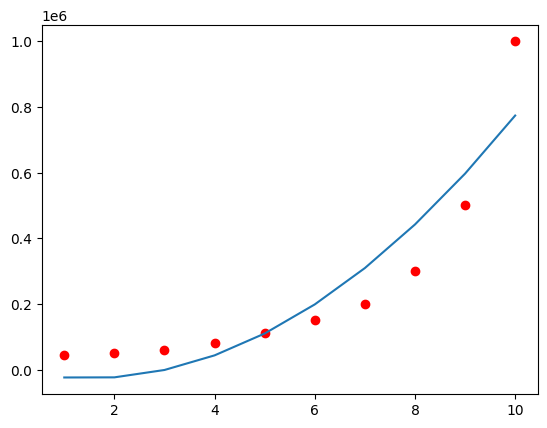

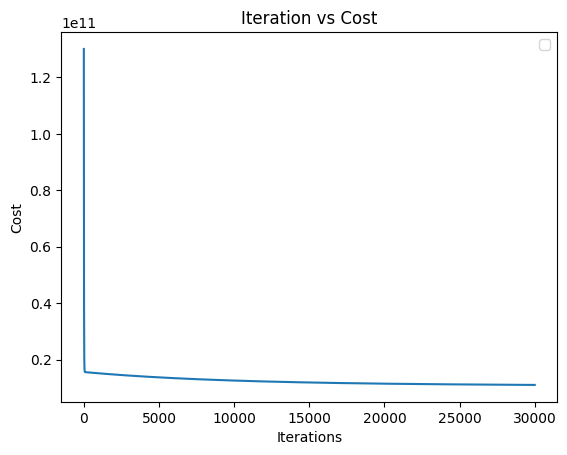

Predicted salaries for levels 7 and 8:
309264
442158


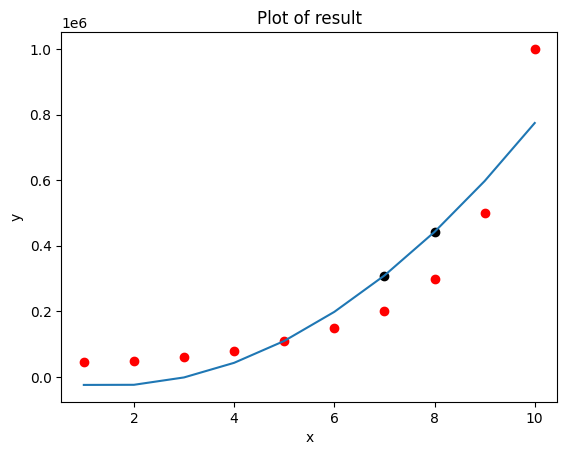

Calculated R-squared: 0.8632381438663573


In [14]:
# Write a code/ function to do the following

# function for your model
def poly(w,b,c,x):
  pred=(c*(x**2))+(w*x)+b
  return pred

# a function for your cost function
def cost(x,y,w,c,b):
   N = x.size
   MSE = (1/N)*np.sum((((c*x*x)+(w*x)+b)-y)**2)
   return MSE


# function to calculate the derivatives
def gradients(x,y,w,b,c):
  N = x.size
  dMSE_dw = (2/N)* (np.sum((((c*x*x)+(w*x)+b)-y)*x))
  dMSE_dc = (2/N)* (np.sum((((c*x*x)+(w*x)+b)-y)*(x*x)))
  dMSE_db = (2/N)* (np.sum(((c*x*x)+(w*x)+b)-y))
  return dMSE_dw,dMSE_dc,dMSE_db

# code to estimate the parametes using gradient descent
# Also estimate the cost function in each iteration
alpha = 0.00001

w = 1
c = 1
b = 2
M = 30000
costlist=[]
for i in range(M):
  dMSE_dw,dMSE_dc,dMSE_db = gradients(x,y,w,b,c)
  w = w - alpha*dMSE_dw
  c = c - alpha*dMSE_dc
  b = b - alpha*dMSE_db
  costlist.append(cost(x,y,w,c,b))

print('The value of w,b,c after ',M,' iterations', w,b,c)
y_pred=poly(w,b,c,x)

 
 
# Plot the model with the data given

plt.scatter(x, y, color = 'red', label='Data')
plt.plot(x,y_pred,label='Predicted')

# plot the iteratio VS cost
plt.figure()
plt.plot(range(M), costlist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Iteration vs Cost')

plt.legend()
plt.show()

# estimate the solution to the given problem

# Function to predict salary for a given level
def predict_salary(level, w, b, c):
    salary = poly(w, b, c, level)
    return salary

# Given levels for prediction
levels_to_predict = np.array([7, 8])

# Predict salaries for levels 7 and 8
predicted_salaries = predict_salary(levels_to_predict, w, b, c)

print("Predicted salaries for levels 7 and 8:")
for salary in predicted_salaries:
   print(round(salary))


# mark the point or result in the graph (plot)
plt.scatter(x, y, color='red', label='Data')
plt.scatter(levels_to_predict,predicted_salaries,color='black')
plt.plot(x,y_pred, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of result')
plt.show()

# Estimate the model performance
# Done by R2

y_mean = np.mean(y)

# Calculate SST
SST = np.sum((y - y_mean) ** 2)

# Calculate SSR
SSE = np.sum((y - y_pred) ** 2)

# Calculate R-squared
r2 = 1 - (SSE / SST)

print("Calculated R-squared:", r2)


### Answer the following

* What is learning rate?
> *  Learning rate is a hyperparameter that controls the size of the steps taken during the optimization process in machine learning algorithms, particularly in gradient-based optimization algorithms like gradient descent.
* What will happen if the learning rate is too large?
> * If the learning rate is too large, the optimization algorithm might surpass the minimum point of the loss function and fail to converge. This can lead to divergence, where the loss function may increase rather than decrease over time.
* What will happen if the learning rate is too small?
> * If the learning rate is too small, the optimization process may take too long to converge. This results in slow convergence and inefficient training.
* If you what to change the second order (quadratic) model to third order model what all things will change in the above code?
> * The model equation has to be updated to accomodate third order model.
> * One more feature has to be found that may represent the third independent variable in the equation.
> * The training data should include the third order features.
> * Train the model according to the third order feature.
> * The prediction code has to be updated accordingly.